### Importar dataset

In [69]:
import pandas as pd


credit = pd.read_csv("creditcard.csv")

display(credit)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Analisar necessidade de tratamento

In [70]:
'''
inexistência de linhas vazias e Datatypes corretos
'''

print(credit.info())

print(credit["Class"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Normalização dos dados

In [71]:
credit_norm = credit.drop("Class", axis=1)

y = credit["Class"]             

credit_norm = credit_norm.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

credit_norm = pd.concat([credit_norm, y], axis=1)

display(credit_norm)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


### Análise PCA para redução da dimensionalidade

    Coluna      Peso
0     Time  0.611059
1       V1  0.053329
2       V2  0.049627
3       V3  0.047362
4       V4  0.036554
5       V5  0.032352
6       V6  0.031363
7       V7  0.027712
8       V8  0.026001
9       V9  0.011472
10     V10  0.011216
11     V11  0.009078
12     V12  0.008798
13     V13  0.008247
14     V14  0.006617
15     V15  0.006219
16     V16  0.004907
17     V17  0.004138
18     V18  0.003899
19     V19  0.002694
20     V20  0.001468
21     V21  0.001319
22     V22  0.001134
23     V23  0.000845
24     V24  0.000689
25     V25  0.000588
26     V26  0.000474
27     V27  0.000444
28     V28  0.000359
29  Amount  0.000035


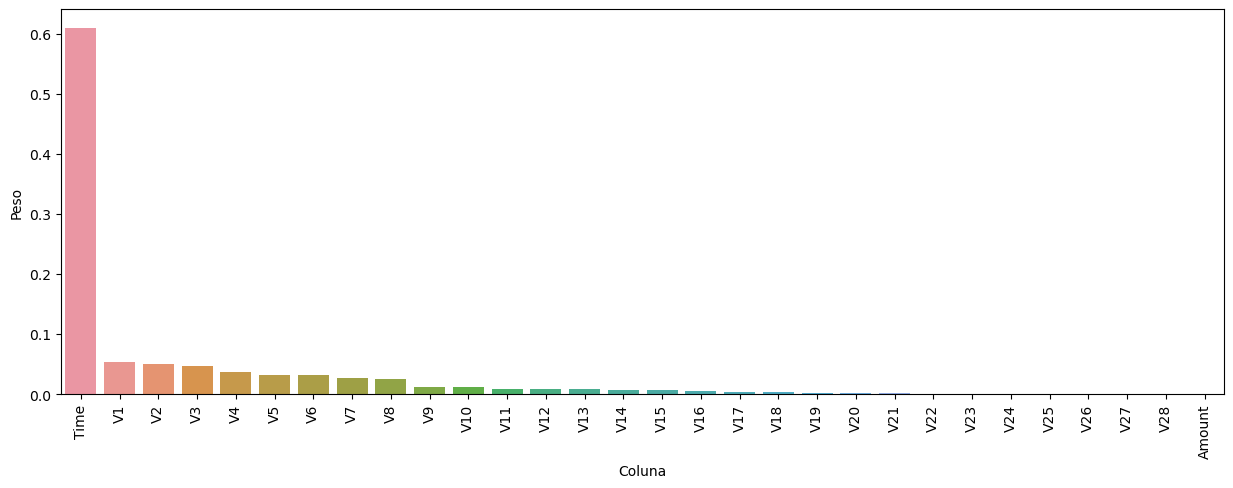

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca_df = credit_norm.drop("Class", axis=1)

pca = PCA()
pca.fit(pca_df)

impacto_pca = pca.explained_variance_ratio_

colunas = list(pca_df.columns)
dic = dict()
for i in range(len(impacto_pca)):
    dic[colunas[i]] = impacto_pca[i]

df = pd.DataFrame({"Coluna": colunas, "Peso": impacto_pca})

print(df.sort_values(by="Peso", ascending=False))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=df["Coluna"], y=df["Peso"])
ax.tick_params(axis='x', rotation=90)

In [73]:
'''
Considerando a variabilidade dos dados em menos de 1%, as colunas de V11 a V28 serão eliminadas. Amount tbm 
'''

credit_norm = credit_norm.drop(["V11", "V12", "V13", "V14","V15", "V16","V17", "V18","V19", "V20","V21", "V22","V23", "V24","V25", "V26","V27", "V28","Amount"], axis=1)

### Identificar necessidade de balanceamento

In [74]:
'''
Dataset encontra-se com uma grande discrepância em relação à qtd de amostras para 0 e para 1
'''

credit_norm[["Class"]].groupby("Class").value_counts()

Class
0    284315
1       492
dtype: int64

### Aplicação do Método SMOTE para balanceamento da qtd de amostras

In [75]:
from imblearn.over_sampling import SMOTE


sm = credit_norm.copy()

# dividir df em X e y
X = sm.drop("Class", axis=1)
y = sm["Class"]

# aplicar método
smote = SMOTE(sampling_strategy="minority", k_neighbors=23)
X_sm, y_sm = smote.fit_resample(X, y)

credit_adj = pd.concat([X_sm, y_sm], axis=1)

In [76]:
print(X_sm)

            Time        V1        V2        V3        V4        V5        V6  \
0       0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1       0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2       0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3       0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4       0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   
...          ...       ...       ...       ...       ...       ...       ...   
568625  0.209033  0.870698  0.824793  0.724282  0.510148  0.736042  0.245995   
568626  0.586663  0.861638  0.825283  0.693088  0.611084  0.742073  0.243636   
568627  0.393633  0.976969  0.761815  0.856484  0.293165  0.756631  0.260411   
568628  0.238490  0.808265  0.831696  0.634991  0.565590  0.711027  0.225887   
568629  0.897033  0.985304  0.780382  0.801683  0.431137  0.775955  0.253320   

              V7        V8        V9   

### Replicação da ideia por trás do algoritmo de perceptron

In [77]:
'''
Definir funções auxiliares
'''

import numpy as np
import random


# definição aleatória de pesos
def weight_random(length):
    return [random.random() for _ in range(length)]


# soma da multiplicação entre as variáveis e seus respectivos pesos
def weighted_sum(x_input, w_weight):
    soma = 0
    for x, w in zip(x_input, w_weight):
        soma += x*w
        
    return soma


# implementação da ideia de não linearidade a partir de uma curva logística
def sigmoid(a):
    return 1/(1 + np.exp(-a))


# definição da previsão a partir do threshold
def predict(prob, threshold):
    if prob >= threshold:
        return 1
    else:
        return 0
    

# função final
def perceptron(x_input, w_weight, threshold):
    
    # soma com pesos de todas variaveis
    soma = weighted_sum(x_input, w_weight)
    
    # aplicação de não linearidade com regressão logística
    prob = sigmoid(soma)
    
    return prob, predict(prob, threshold)


# função de cálculo dos custos associados ao erro pelo princípio de cross entropy loss
def cross_entropy_loss(w_sum, target, prediction):
    
    # criar dataframe
    data = {"w_sum": w_sum, "target": target, "predicted": prediction}
    df = pd.DataFrame(data)
    
    # cálculo do custo por linha
    df["loss"] = - (df["target"]*np.log10(df["w_sum"]) + (1-df["target"])*np.log10(1-df["w_sum"]))
    
    # retornar custo total do modelo
    return df["loss"].mean()

In [122]:
'''
Implementação inicial com pesos aleatórios
'''

# divisão de 75% dos dados para treino e 25% para teste
treino = credit_adj.sample(frac=0.75).reset_index()
treino = treino.drop("index", axis=1)
teste = credit_adj[~credit_adj.apply(tuple,1).isin(treino.apply(tuple,1))].reset_index() # cruzar treino e credit_adj e pegar apenas linhas que não aparecem em ambas
teste = teste.drop("index", axis=1)

# dividir df em features e label
entrada = treino.drop("Class", axis=1)
target = list(treino["Class"])

# dicionario resumo
interacoes = {}
cont = 0

interacao = {}

# definir pesos aleatoriamente
pesos = weight_random(len(list(entrada.columns)))

# lista de predição
prediction = []
w_sum = []

    
# iterar sobre cada amostra treino
for linha in entrada.index:

    # variaveis de entrada
    x_input = list(entrada.iloc[linha, :])
        
    # na primeira iteração, os pesos são aleatórios
    soma, p = perceptron(x_input, pesos, 0.5)

    # adicionar previsao na lista predict
    prediction.append(p)

    # adicionar soma para cálculo do custo total
    w_sum.append(soma)
    
# cálculo do custo
loss = cross_entropy_loss(w_sum, target, prediction)

# cálculo da acurácia
certos = 0
for y, pred in zip(target, prediction):
    if y == pred:
        certos = certos + 1
        
acuracia = certos / len(target)

interacao["weights"] = pesos
interacao["w_sum"] = w_sum
interacao["prediction"] = prediction
interacao["loss"] = loss
interacao["accuracy"] = acuracia

interacoes[0] = interacao.copy()

media = sum(w_sum)/len(w_sum)

print(f"Média Predictions: {media}")
print(f"Acurácia: {acuracia}")
print(f"Avarage Loss: {loss}")

Média Predictions: 0.9478248672458001
Acurácia: 0.5001359995497946
Avarage Loss: 0.66443116649119


### Aplicação da ideia de Gradient Descent e Mini Batch

In [121]:
'''
Considerando a ideia de um processo estocástico ("andar de um bêbado"), a descida do gradiente tende a não ser linear, logo
esse primeiro formato testado pode não ser o ideal, uma vez que se restringe a poucas iterações e assume a linearidade
do processo. Na célula abaixo, tentarei aplicar valores fixos para epoch, buscando perceber se a acurácia é otimizada
'''

import math


learning_rate = 0.001

loss_0 = 10**10
loss_1 = loss

new_pesos = {}


# loop até encontrar o mínimo local
while loss_0 > loss_1:
    
    interacao.clear()
    
    cont += 1
    
    w_sum.clear()
    
    # batch de 500 amostras
    batch = entrada.sample(500)
    
    
    # definir novos pesos para cada amostra
    for b in batch.index:
        n_pesos = [w - (learning_rate*(target[b]-prediction[b])) for w in pesos]
        
        # retomar valor original caso determinado peso tenha sido zerado pela regularização na iteração interior
        current = cont
        while 0 in n_pesos:
            index = n_pesos.index(0)
            n_pesos[index] = interacoes[current-1]["weights"][index]
            current -= 1
        
        new_pesos[b] = n_pesos
    
    # pegar a média dos pesos para cada amostra
    somas = [0] * len(pesos)
    
    for i in range(len(pesos)):  # somar valores
        for k in new_pesos.keys():
            somas[i] += new_pesos[k][i]
        
    pesos = [som/len(batch) for som in somas]  # encontrar médias
    
    # regularization (dropout de 10%)
    for j in range(math.floor(0.1*len(pesos))):
        n1 = random.randint(0,len(pesos)-1)
        #n2 = n1
        #while n2 == n1:
            #n2 = random.randint(0,len(pesos)-1)
            
    pesos[n1] = 0
    #pesos[n2] = 0
            
    prediction.clear()
    
    # iterar sobre cada linha
    for linha in entrada.index:
        
        # variaveis de entrada
        x_input = list(entrada.iloc[linha, :])

        # na primeira iteração, os pesos são aleatórios
        prob, p = perceptron(x_input, pesos, 0.5)

        # adicionar previsao na lista predict
        prediction.append(p)

        # adicionar soma para cálculo do custo
        w_sum.append(prob)

    # cálculo do custo
    loss = cross_entropy_loss(w_sum, target, prediction)
    
    # cálculo da acurácia
    certos = 0
    for y, pred in zip(target, prediction):
        if y == pred:
            certos = certos + 1
        
    acuracia = certos / len(target)
    
    interacao["weights"] = pesos
    interacao["w_sum"] = w_sum
    interacao["prediction"] = prediction
    interacao["loss"] = loss
    interacao["accuracy"] = acuracia
    
    interacoes[cont] = interacao.copy()
    
    print(loss)
    
    # atualizar custo
    loss_0 = loss_1
    
    loss_1 = loss
    



0.5297616557242247
0.9289648900291193


In [123]:
'''
Decréscimo do gradiente a partir de uma epoch fixada previamente (inicialmente com valor = 50)
Mudanças adicionais foram realizadas, como a substituição do threshhold igual à média (agora = 0.5)
'''
import math


# definição das variáveis
learning_rate = 0.001

EPOCH = 50 

# lista que será atualizada com os novos pesos
new_pesos = {}


# loop até encontrar o mínimo local
for inter in range(EPOCH):
    
    cont += 1   
    
    # batch de 500 amostras
    batch = entrada.sample(500)
    
    
    # definir novos pesos para cada amostra
    for b in batch.index:
        n_pesos = [w - (learning_rate*(target[b]-prediction[b])) for w in pesos]
        
        # retomar valor original caso determinado peso tenha sido zerado pela regularização na iteração interior
        current = inter
        while 0 in n_pesos:
            index = n_pesos.index(0)
            n_pesos[index] = interacoes[current-1]["weights"][index]
            current -= 1
        
        new_pesos[b] = n_pesos
    
    # pegar a média dos pesos para cada amostra
    somas = [0] * len(pesos)
    
    for i in range(len(pesos)):  # somar valores
        for k in new_pesos.keys():
            somas[i] += new_pesos[k][i]
        
    pesos = [som/len(batch) for som in somas]  # encontrar médias
    
    # regularization (dropout de 10%)
    for j in range(math.floor(0.1*len(pesos))):
        n1 = random.randint(0,len(pesos)-1)
        #n2 = n1
        #while n2 == n1:
        #    n2 = random.randint(0,len(pesos)-1)
            
    pesos[n1] = 0
    #pesos[n2] = 0
            
    prediction.clear()
    w_sum.clear()
    
    # iterar sobre cada linha
    for linha in entrada.index:
        
        # variaveis de entrada
        x_input = list(entrada.iloc[linha, :])

        # na primeira iteração, os pesos são aleatórios
        prob, p = perceptron(x_input, pesos, 0.5)

        # adicionar previsao na lista predict
        prediction.append(p)

        # adicionar prob para cálculo do custo final
        w_sum.append(prob)

    # cálculo do custo
    loss = cross_entropy_loss(w_sum, target, prediction)
    
    # cálculo da acurácia
    certos = 0
    for y, pred in zip(target, prediction):
        if y == pred:
            certos = certos + 1
        
    acuracia = certos / len(target)
    
    interacao["weights"] = pesos
    interacao["w_sum"] = w_sum
    interacao["prediction"] = prediction
    interacao["loss"] = loss
    interacao["accuracy"] = acuracia
    
    interacoes[cont] = interacao.copy()
    
    interacao.clear()
    
    print(f"Epoch: {inter+1}/{EPOCH}")
    print(f"Loss: {loss}")
    print(f"Accuracy: {acuracia}")
    print()
    
    


Epoch: 1/50
Loss: 0.5538731518610125
Accuracy: 0.5001359995497946

Epoch: 2/50
Loss: 1.1415940576280115
Accuracy: 0.5001359995497946

Epoch: 3/50
Loss: 2.2456137102493976
Accuracy: 0.5001359995497946

Epoch: 4/50
Loss: 3.6177910400238678
Accuracy: 0.5001359995497946



C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch: 5/50
Loss: inf
Accuracy: 0.5001359995497946



C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch: 6/50
Loss: inf
Accuracy: 0.5001359995497946



KeyboardInterrupt: 

### Evolução da acurácia e do custo

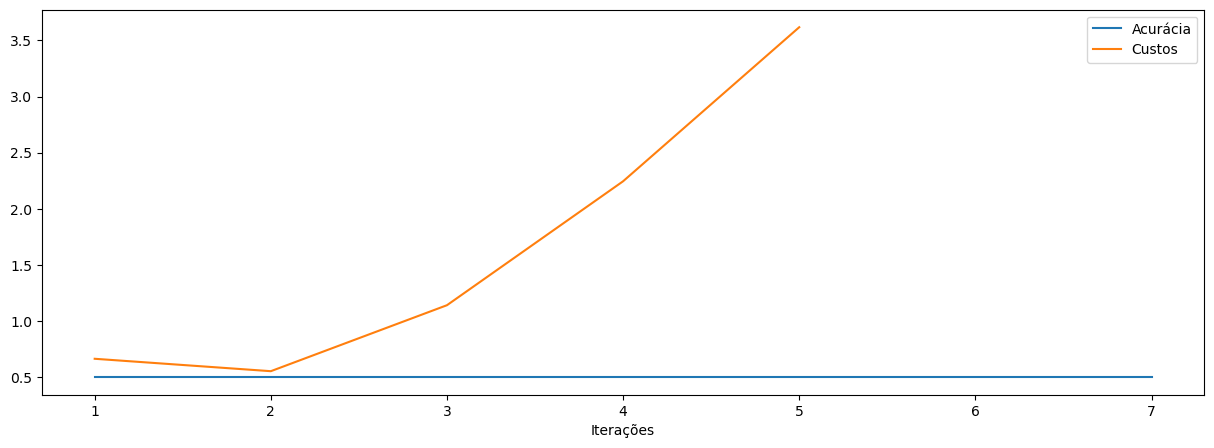

In [124]:
import matplotlib.pyplot as plt

accuracies = [interacoes[i]["accuracy"] for i in interacoes.keys()]
losses = [interacoes[i]["loss"] for i in interacoes.keys()]

# Criar eixo x para as iterações
iterations_axis = range(1, len(interacoes) + 1)

plt.figure(figsize=(15, 5))
plt.plot(iterations_axis, accuracies, label="Acurácia")
plt.plot(iterations_axis, losses, label="Custos")
plt.xlabel("Iterações")
plt.legend()
plt.show()

In [89]:
print(interacoes[50]["weights"])
print(interacoes[50]["accuracy"])

[0.000712725439920274, 0.0002821218052766025, 0, 0.0006992277326778647, 0, 0.0003882612703631155, 0.0005800591496488023, 0.0007328502279859439, 0.0008665648908360141, 0.0008790406120591235, 0.0008278807750205125]
0.5006026186947795


In [114]:
for x in range(5):
    print(interacoes[x]["weights"])
    print()

[0.8901299010261012, 0.8541284532587126, 0.12587814366099037, 0.23872906157980667, 0.6318982266653775, 0.681465381062337, 0.2906754319587034, 0.032329971135661495, 0.3369827647622594, 0.7410232697810613, 0.7818137157510711]

[0.8906559010261018, 0.8546544532587178, 0, 0.23925506157980644, 0.6324242266653793, 0.6819913810623367, 0.29120143195870485, 0.032855971135661376, 0.3375087647622613, 0.7415492697810623, 0.7823397157510674]

[1.7782692824480832, 0, 0.12641863108634513, 0.4780732069132874, 1.2628388604241083, 1.3617749006004245, 0.58175816218958, 0.06610062238677965, 0.6741875984654687, 1.4806524464830184, 1.5620701766391105]

[3.557064564896114, 1.706936392704376, 0.2533632621726923, 0.9566724138265837, 2.5262037208482493, 2.7240758012008772, 0, 0.13272724477355927, 1.3489011969309228, 2.961830892965991, 3.1246663532781684]

[7.114649129792301, 3.414392785408756, 0.5072465243453786, 1.913864827653167, 5.05292744169654, 5.448671602401725, 1.1645623243791579, 0.26597448954711633, 0,

In [115]:
for x in range(5):
    print(interacoes[x]["w_sum"][:10])
    print()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



### Validação dos pesos nas variaveis teste

In [59]:
# dividir df em features e label
entrada1 = teste.drop("Class", axis=1)
target1 = list(teste["Class"])

# definir pesos
pesos = interacoes[2]["weights"]

# lista de predição
prediction = []
w_sum = []

    
# iterar sobre cada amostra
for linha in entrada1.index:

    # variaveis de entrada
    x_input = list(entrada1.iloc[linha, :])
        
    # na primeira iteração, os pesos são aleatórios
    soma, p = perceptron(x_input, pesos, 0.5)

    # adicionar previsao na lista predict
    prediction.append(p)

    # adicionar soma para cálculo do custo
    w_sum.append(soma)
    
# cálculo do custo
loss = cross_entropy_loss(w_sum, target1, prediction)

certos = 0
for y, pred in zip(target1, prediction):
    if y == pred:
        certos = certos + 1
        
acuracia = certos / len(target1)


media = sum(w_sum)/len(w_sum)

print(f"Média Predictions: {media}")
print(f"Acurácia: {acuracia}")
print(f"Avarage Loss: {loss}")

Média Predictions: 0.500581585997753
Acurácia: 0.5011105452281923
Avarage Loss: 0.3010497115094095


### Comparação usando TensorFlow

In [60]:
'''
A baixa acurácia no teste pode indicar um overfitting do modelo criado
'''

# baseado na aula sugerida do MIT

import tensorflow as tf


X_train = treino.drop("Class", axis=1)
y_train = treino["Class"]
X_test = teste.drop("Class", axis=1)
y_test = teste["Class"]

# numero de features
num_features = len(credit_norm.columns) - 1

# criação do modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compilar modelo
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# treinar modelo
model.fit(X_train, y_train, epochs=100)

# predict
predictions = model.predict(X_test)

# converter predições para binário
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# printar acurácia do modelo
certos = 0
for y, pred in zip(y_test, binary_predictions):
    if y == pred[0]:
        certos = certos + 1
        
acuracia = certos / len(target1)


media = sum(w_sum)/len(w_sum)

print(f"Accuracy: {media}")



Epoch 1/100
13328/13328 [==============================] - 27s 2ms/step - loss: 0.5307 - accuracy: 0.8351
Epoch 2/100
13328/13328 [==============================] - 27s 2ms/step - loss: 0.3922 - accuracy: 0.8908
Epoch 3/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.3414 - accuracy: 0.8974
Epoch 4/100
13328/13328 [==============================] - 27s 2ms/step - loss: 0.3125 - accuracy: 0.9019
Epoch 5/100
13328/13328 [==============================] - 21s 2ms/step - loss: 0.2934 - accuracy: 0.9060
Epoch 6/100
13328/13328 [==============================] - 20s 1ms/step - loss: 0.2795 - accuracy: 0.9090
Epoch 7/100
13328/13328 [==============================] - 19s 1ms/step - loss: 0.2690 - accuracy: 0.9110
Epoch 8/100
13328/13328 [==============================] - 21s 2ms/step - loss: 0.2607 - accuracy: 0.9123
Epoch 9/100
13328/13328 [==============================] - 21s 2ms/step - loss: 0.2539 - accuracy: 0.9134
Epoch 10/100
13328/13328 [====================

13328/13328 [==============================] - 26s 2ms/step - loss: 0.1797 - accuracy: 0.9335
Epoch 78/100
13328/13328 [==============================] - 25s 2ms/step - loss: 0.1794 - accuracy: 0.9337
Epoch 79/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.1791 - accuracy: 0.9337
Epoch 80/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.1788 - accuracy: 0.9339
Epoch 81/100
13328/13328 [==============================] - 27s 2ms/step - loss: 0.1786 - accuracy: 0.9341
Epoch 82/100
13328/13328 [==============================] - 27s 2ms/step - loss: 0.1783 - accuracy: 0.9342
Epoch 83/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.1780 - accuracy: 0.9344
Epoch 84/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.1778 - accuracy: 0.9345
Epoch 85/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.1775 - accuracy: 0.9346
Epoch 86/100
13328/13328 [========================

### Modelo do TensorFlow usando regularização

In [62]:
'''
Aplicação de regularização L2 para tentar melhorar a generalização do modelo
'''

X_train = treino.drop("Class", axis=1)
y_train = treino["Class"]
X_test = teste.drop("Class", axis=1)
y_test = teste["Class"]

# numero de features
num_features = len(credit_norm.columns) - 1

# criação do modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

# compilar modelo
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# treinar modelo
model.fit(X_train, y_train, epochs=100)

# predict
predictions = model.predict(X_test)

# converter predições para binário
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# printar acurácia do modelo
certos = 0
for y, pred in zip(y_test, binary_predictions):
    if y == pred[0]:
        certos = certos + 1
        
acuracia = certos / len(target1)


media = sum(w_sum)/len(w_sum)

print(f"Accuracy: {media}")

Epoch 1/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6240 - accuracy: 0.8068
Epoch 2/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6056 - accuracy: 0.8567
Epoch 3/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6049 - accuracy: 0.8594
Epoch 4/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6047 - accuracy: 0.8601
Epoch 5/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6047 - accuracy: 0.8607
Epoch 6/100
13328/13328 [==============================] - 23s 2ms/step - loss: 0.6046 - accuracy: 0.8610
Epoch 7/100
13328/13328 [==============================] - 22s 2ms/step - loss: 0.6046 - accuracy: 0.8612
Epoch 8/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6047 - accuracy: 0.8612
Epoch 9/100
13328/13328 [==============================] - 23s 2ms/step - loss: 0.6046 - accuracy: 0.8614
Epoch 10/100
13328/13328 [====================

13328/13328 [==============================] - 26s 2ms/step - loss: 0.6046 - accuracy: 0.8616
Epoch 78/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.6046 - accuracy: 0.8615
Epoch 79/100
13328/13328 [==============================] - 25s 2ms/step - loss: 0.6046 - accuracy: 0.8613
Epoch 80/100
13328/13328 [==============================] - 29s 2ms/step - loss: 0.6046 - accuracy: 0.8614
Epoch 81/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.6046 - accuracy: 0.8620
Epoch 82/100
13328/13328 [==============================] - 23s 2ms/step - loss: 0.6046 - accuracy: 0.8616
Epoch 83/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6046 - accuracy: 0.8617
Epoch 84/100
13328/13328 [==============================] - 26s 2ms/step - loss: 0.6046 - accuracy: 0.8617
Epoch 85/100
13328/13328 [==============================] - 24s 2ms/step - loss: 0.6046 - accuracy: 0.8618
Epoch 86/100
13328/13328 [========================